In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize
import matplotlib.lines as mlines
from scipy.interpolate import UnivariateSpline
from tqdm import tqdm
import pickle
import numpy as np

import crflux.models as pm

from MCEq.data import InteractionCrossSections
from MCEq.core import MCEqRun
import  mceq_underground_helpers_oneregion_threshold as helper
from scipy.optimize import curve_fit
from scipy.stats import linregress

In [2]:
def sl_depth(d,angle):
    return d/np.cos(np.deg2rad(angle))

In [3]:
plot_dir = '/hetghome/khymon/Plots/cs-analysis/'


X = helper.slant_depths[2:-1:4]

In [4]:
cs_p_values = [1.0,1.01] #[0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5]  # List of cross-section values: pion-air
cs_k_values = [1.00]
cs_pr_values = [1.00]
ptype_values = [2212] 
season_values = ["jan", "apr", "jul"]  #  seasons
e0_values = [2.05,2.15,2.25,2.35,2.45,2.55,2.65,2.75,2.85,2.95,3.05,3.15,3.25,3.35,3.45,3.55,3.65,3.75,3.85,3.95,4.05,4.15,4.25,4.35,4.45,4.55,4.65,4.75,4.85]
e1_values = [2.25,2.35,2.45,2.55,2.65,2.75,2.85,2.95,3.05,3.15,3.25,3.35,3.45,3.55,3.65,3.75,3.85,3.95,4.05,4.15,4.25,4.35,4.45,4.55,4.65,4.75,4.85,4.95,5.05]
e_center = e0_values + np.ones(len(e0_values))*0.1
pairwise = True


helper.initialize_flux_dicts(
        ptype_values, cs_p_values, cs_k_values, cs_pr_values, e0_values, e1_values if 'e1_values' in locals() else [None], pairwise=pairwise
) 

helper.some_function_that_uses_angles()
angles = helper.angles

2.05 2.25
helper script 2.05 2.25 1.01 1.0 1.0
2.15 2.35
helper script 2.15 2.35 1.01 1.0 1.0
2.25 2.45
helper script 2.25 2.45 1.01 1.0 1.0
2.35 2.55
helper script 2.35 2.55 1.01 1.0 1.0
2.45 2.65
helper script 2.45 2.65 1.01 1.0 1.0
2.55 2.75
helper script 2.55 2.75 1.01 1.0 1.0
2.65 2.85
helper script 2.65 2.85 1.01 1.0 1.0
2.75 2.95
helper script 2.75 2.95 1.01 1.0 1.0
2.85 3.05
helper script 2.85 3.05 1.01 1.0 1.0
2.95 3.15
helper script 2.95 3.15 1.01 1.0 1.0
3.05 3.25
helper script 3.05 3.25 1.01 1.0 1.0
3.15 3.35
helper script 3.15 3.35 1.01 1.0 1.0
3.25 3.45
helper script 3.25 3.45 1.01 1.0 1.0
3.35 3.55
helper script 3.35 3.55 1.01 1.0 1.0
3.45 3.65
helper script 3.45 3.65 1.01 1.0 1.0
3.55 3.75
helper script 3.55 3.75 1.01 1.0 1.0
3.65 3.85
helper script 3.65 3.85 1.01 1.0 1.0
3.75 3.95
helper script 3.75 3.95 1.01 1.0 1.0
3.85 4.05
helper script 3.85 4.05 1.01 1.0 1.0
3.95 4.15
helper script 3.95 4.15 1.01 1.0 1.0
4.05 4.25
helper script 4.05 4.25 1.01 1.0 1.0
4.15 4.35
hel

In [5]:
cs_p = 1.01
cs_k = 1.0
cs_pr = 1.0
angle = 0.0

In [6]:
def get_log_y(X, angle,cs_p,cs_k,e0,e1,season,threshold):
    log_y = np.log10(1e4*helper.mult_dist(X,
                            angle,
                            pm.GlobalSplineFitBeta(),"yields_" + season,
                            2212,
                            cs_p, cs_k,cs_pr,e0,e1,
                            norm=False,threshold=threshold#))[0]
                        ) / helper.rates(X, angle, season, 2212, cs_p, cs_k,cs_pr, e0,e1,threshold))

    return log_y

In [7]:
def get_derivative(x_log, log_y):

    deriv_low = (log_y[19] - log_y[1])/(np.log10(x_log[19])-np.log10(x_log[1])) 
    deriv_high = (log_y[99] - log_y[59])/(np.log10(x_log[99])-np.log10(x_log[59])) 

    return np.array([deriv_low, deriv_high])

In [8]:
x_log = np.log10(helper.n_mu_vec)

In [9]:
sl = sl_depth(1.5,angles)

deriv_mod_sl_500 =np.ndarray(shape=(len(sl),3,len(e0_values),2))
deriv_def_sl_500 = np.ndarray(shape=(len(sl),3,2))

for s in range(len(sl)):  
    for sea in range(len(season_values)):  

        
        y_log_def_sl_500 = get_log_y(sl[s], angle, 1.0, cs_k ,2.05,"inf",season_values[sea],threshold=500)
        deriv_def_sl_500[s][sea] = get_derivative(x_log, y_log_def_sl_500)

        for en in range(len(e0_values)):
            logy_mod_500 = get_log_y(sl[s], angle, cs_p, cs_k ,e0_values[en],e1_values[en],season_values[sea],threshold=500)
            deriv_mod_sl_500[s][sea][en] = get_derivative(x_log, logy_mod_500)

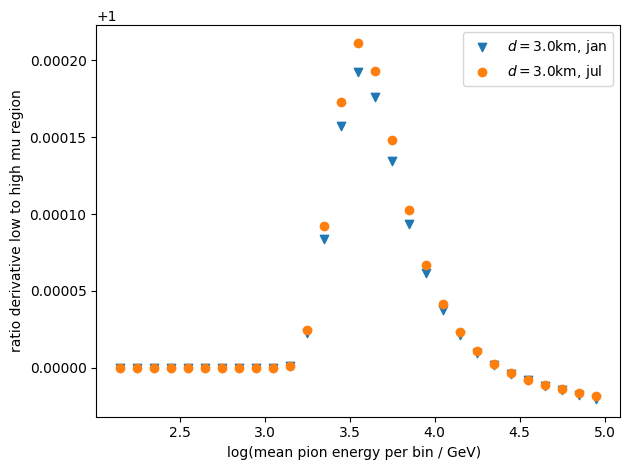

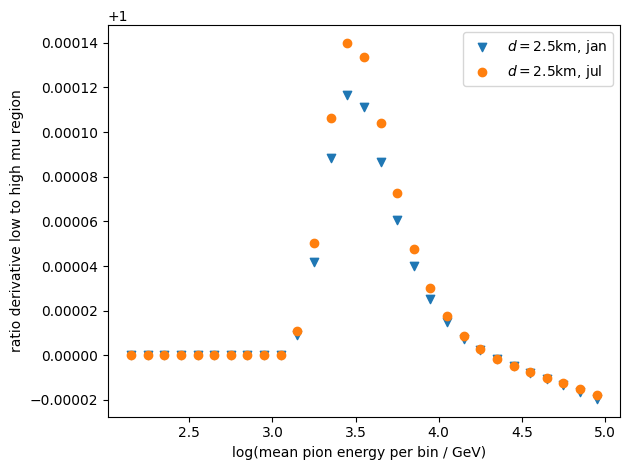

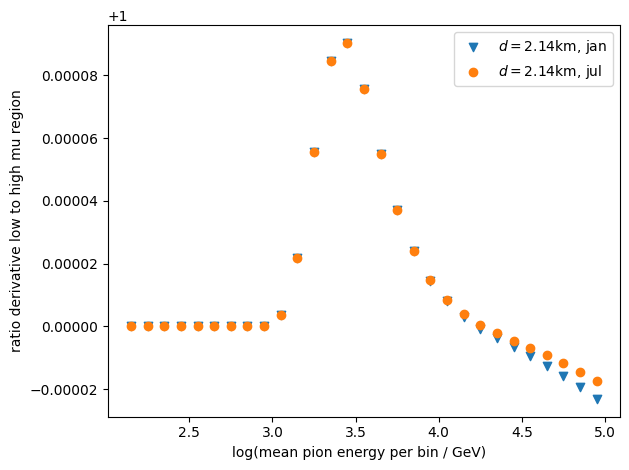

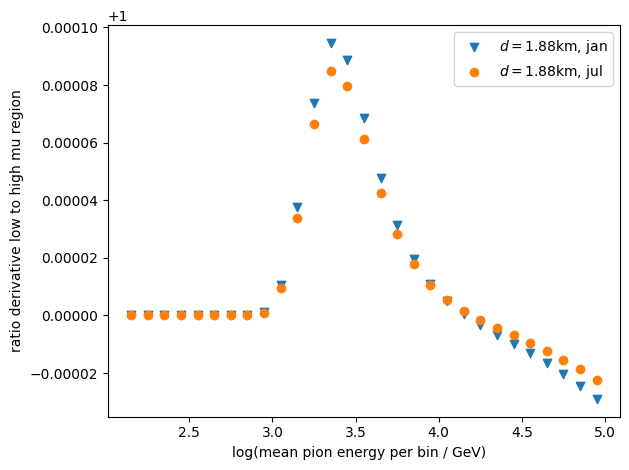

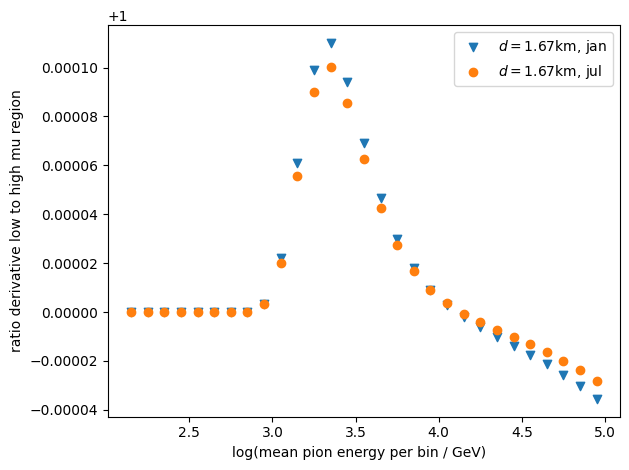

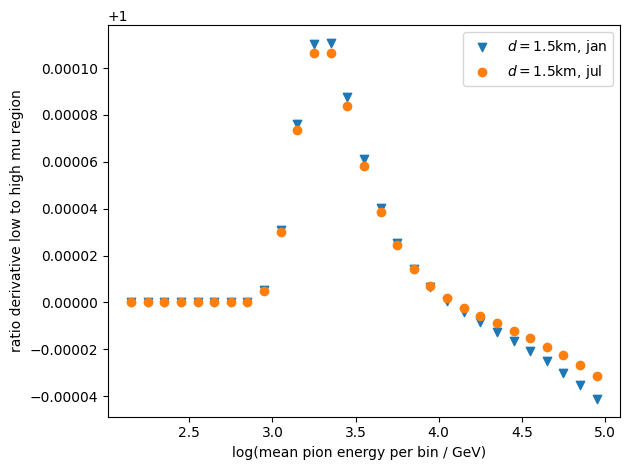

<Figure size 640x480 with 0 Axes>

In [10]:
# ratio to apr

for s in range(len(sl)):

    def_ratio_sl_500_apr  = np.ones(len(e_center))* (deriv_def_sl_500[s][1][0]/deriv_def_sl_500[s][1][1])
    def_ratio_sl_500_jan  = np.ones(len(e_center))* (deriv_def_sl_500[s][0][0]/deriv_def_sl_500[s][0][1])
    def_ratio_sl_500_jul = np.ones(len(e_center))* (deriv_def_sl_500[s][2][0]/deriv_def_sl_500[s][2][1])



    #plt.scatter(e_center,(deriv_mod_sl[s,:,0]/deriv_mod_sl[s,:,1])/def_ratio_sl,label="$d=$" +str(np.round(sl[s],decimals=2)) + "km",marker='.')
    plt.scatter(e_center,(deriv_mod_sl_500[s,0,:,0]/deriv_mod_sl_500[s,0,:,1])/def_ratio_sl_500_jan,label="$d=$" +str(np.round(sl[s],decimals=2)) + "km, jan",marker='v')
    plt.scatter(e_center,(deriv_mod_sl_500[s,2,:,0]/deriv_mod_sl_500[s,2,:,1])/def_ratio_sl_500_jul,label="$d=$" +str(np.round(sl[s],decimals=2)) + "km, jul",marker='o')
    plt.ylabel('ratio derivative low to high mu region')
    plt.xlabel('log(mean pion energy per bin / GeV)  ')
    plt.legend()
    plt.tight_layout()
    plt.savefig(plot_dir + 'cs_p_energybintest_powerlawderiv_ratio-to-def_ebin_slantdepth' + str(sl[s]) + '_seasons.png')
    plt.show()
    plt.clf()

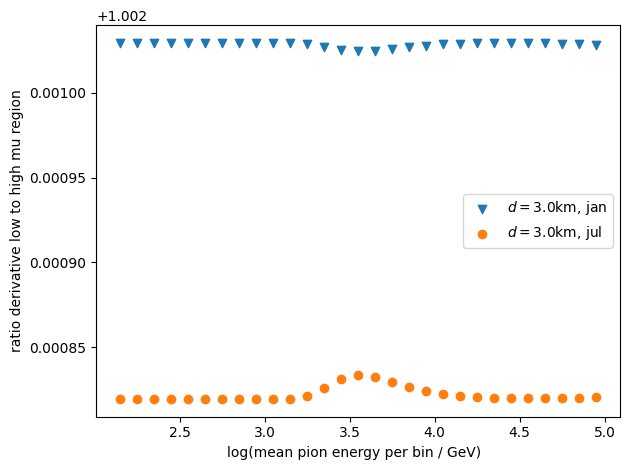

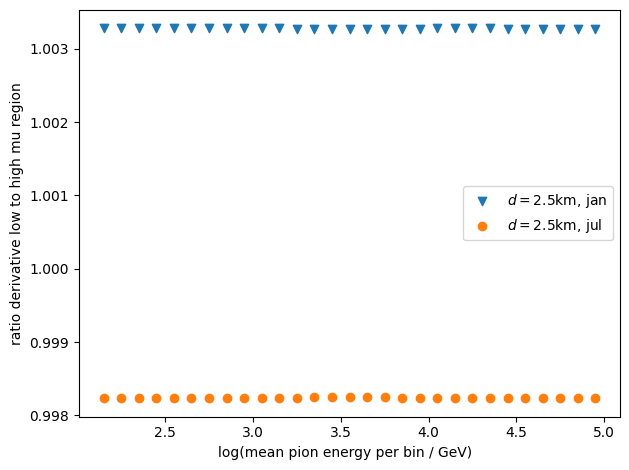

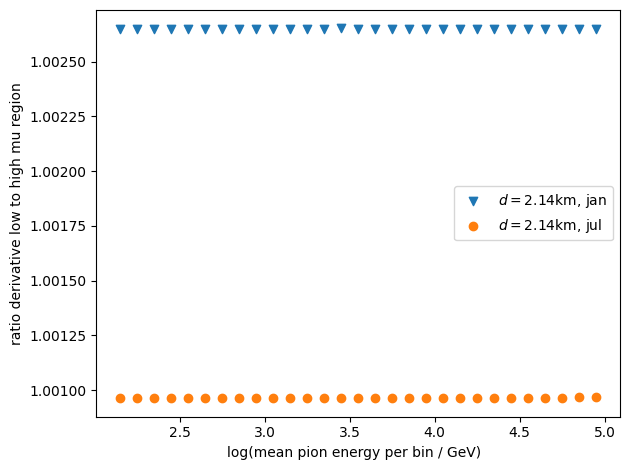

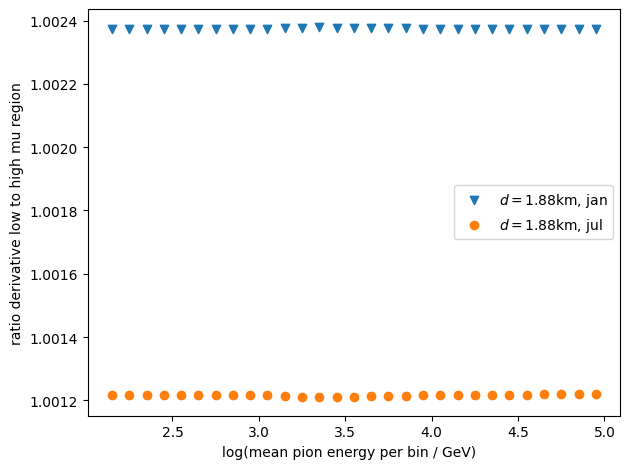

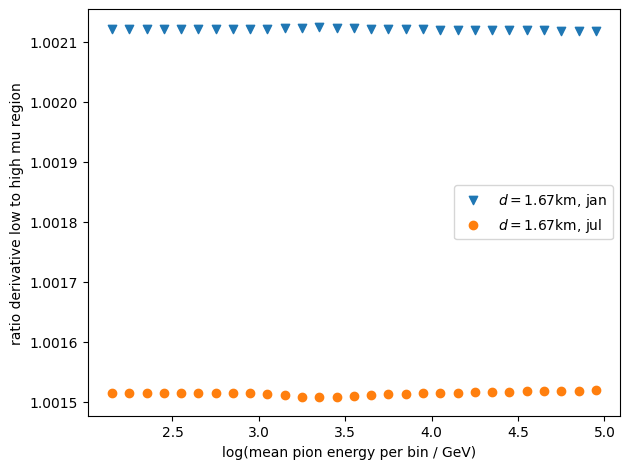

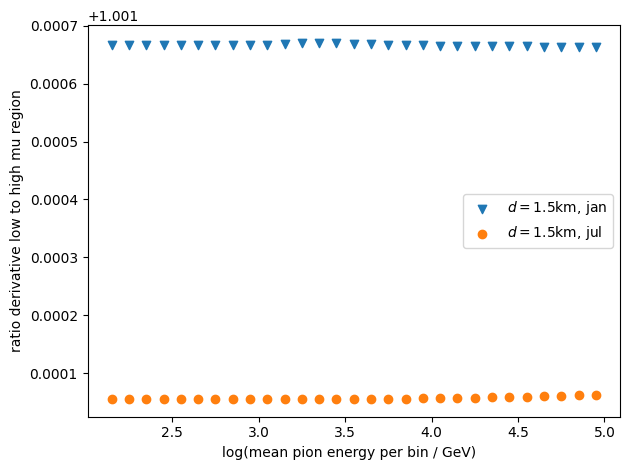

<Figure size 640x480 with 0 Axes>

In [11]:
for s in range(len(sl)):
    

    def_ratio_sl_500_apr  = np.ones(len(e_center))* (deriv_def_sl_500[s][1][0]/deriv_def_sl_500[s][1][1])
    def_ratio_sl_500_jan  = np.ones(len(e_center))* (deriv_def_sl_500[s][0][0]/deriv_def_sl_500[s][0][1])
    def_ratio_sl_500_jul = np.ones(len(e_center))* (deriv_def_sl_500[s][2][0]/deriv_def_sl_500[s][2][1])



    #plt.scatter(e_center,(deriv_mod_sl[s,:,0]/deriv_mod_sl[s,:,1])/def_ratio_sl,label="$d=$" +str(np.round(sl[s],decimals=2)) + "km",marker='.')
    plt.scatter(e_center,(deriv_mod_sl_500[s,0,:,0]/deriv_mod_sl_500[s,0,:,1])/(deriv_mod_sl_500[s,1,:,0]/deriv_mod_sl_500[s,1,:,1]),label="$d=$" +str(np.round(sl[s],decimals=2)) + "km, jan",marker='v')
    plt.scatter(e_center,(deriv_mod_sl_500[s,2,:,0]/deriv_mod_sl_500[s,2,:,1])/(deriv_mod_sl_500[s,1,:,0]/deriv_mod_sl_500[s,1,:,1]),label="$d=$" +str(np.round(sl[s],decimals=2)) + "km, jul",marker='o')
    plt.ylabel('ratio derivative low to high mu region')
    plt.xlabel('log(mean pion energy per bin / GeV)  ')
    plt.legend()
    plt.tight_layout()
    plt.savefig(plot_dir + 'cs_p_energybintest_powerlawderiv_ratio-to-deriv-apr_ebin_slantdepth' + str(sl[s]) + '_seasons.png')
    plt.show()
    plt.clf()

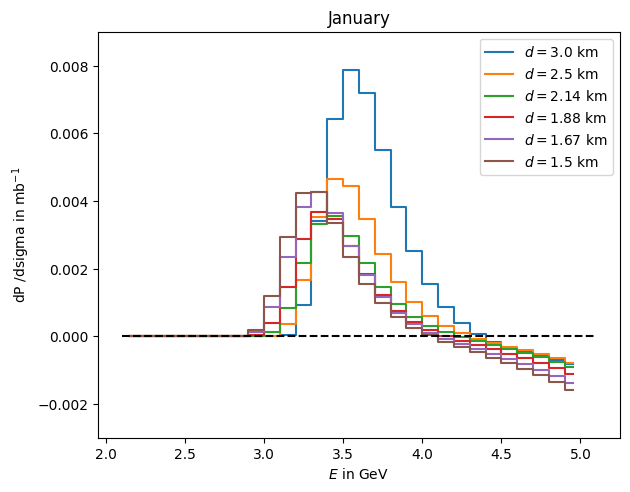

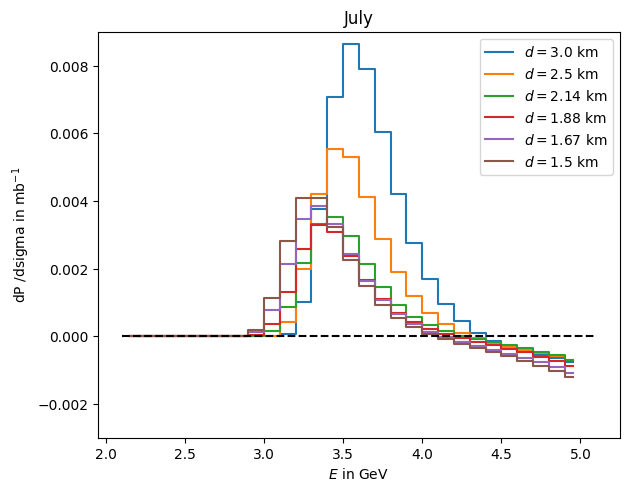

<Figure size 640x480 with 0 Axes>

In [12]:
(deriv_mod_sl_500[s,0,:,0]/deriv_mod_sl_500[s,0,:,1])


def_ratio_sl_500_jan = np.ones(len(sl))* (deriv_def_sl_500[:,0,0]/deriv_def_sl_500[:,0,1])
def_ratio_sl_500_apr = np.ones(len(sl))* (deriv_def_sl_500[:,1,0]/deriv_def_sl_500[:,1,1])
def_ratio_sl_500_jul = np.ones(len(sl))* (deriv_def_sl_500[:,2,0]/deriv_def_sl_500[:,2,1])

delta_P_500_jan = (deriv_mod_sl_500[:,0,:,0]/deriv_mod_sl_500[:,0,:,1])-def_ratio_sl_500_jan[:,np.newaxis]
delta_P_500_apr = (deriv_mod_sl_500[:,1,:,0]/deriv_mod_sl_500[:,1,:,1])-def_ratio_sl_500_apr[:,np.newaxis]
delta_P_500_jul = (deriv_mod_sl_500[:,2,:,0]/deriv_mod_sl_500[:,2,:,1])-def_ratio_sl_500_jul[:,np.newaxis]


dP_dsig_500_jan = delta_P_500_jan/0.01
dP_dsig_500_apr = delta_P_500_apr/0.01
dP_dsig_500_jul = delta_P_500_jul/0.01

#plot for all energy bins
for d in range(len(sl)):
    plt.plot(e_center, dP_dsig_500_jan[d,],label="$d=$" + str(np.round(sl[d],decimals=2)) + " km",drawstyle='steps-mid')
plt.ylabel('dP /dsigma in mb$^{-1}$')
plt.xlabel('$E$ in GeV')
plt.ylim([-0.003,0.009])
plt.plot([2.1,5.1],[0.,0.],color='black',ls='--')
plt.legend()
plt.tight_layout()
plt.title('January')
plt.savefig(plot_dir + 'cs_p_energybintest_powerlawderiv_dPdsig_ebin_slantdepth_season_jan.png')
plt.show()
plt.clf()

for d in range(len(sl)):
    plt.plot(e_center, dP_dsig_500_jul[d,],label="$d=$" + str(np.round(sl[d],decimals=2)) + " km",drawstyle='steps-mid')
plt.ylabel('dP /dsigma in mb$^{-1}$')
plt.xlabel('$E$ in GeV')
plt.plot([2.1,5.1],[0.,0.],color='black',ls='--')
plt.ylim([-0.003,0.009])
plt.legend()
plt.tight_layout()
plt.title('July')
plt.savefig(plot_dir + 'cs_p_energybintest_powerlawderiv_dPdsig_ebin_slantdepth_season_jul.png')
plt.show()
plt.clf()

/tmp/ipykernel_2576999/4267100454.py:4: RuntimeWarning: invalid value encountered in divide
  plt.plot(e_center, dP_dsig_500_jan[d,]/dP_dsig_500_apr[d,],label="$d=$" + str(np.round(sl[d],decimals=2)) + " km",drawstyle='steps-mid',ls='--')
/tmp/ipykernel_2576999/4267100454.py:4: RuntimeWarning: divide by zero encountered in divide
  plt.plot(e_center, dP_dsig_500_jan[d,]/dP_dsig_500_apr[d,],label="$d=$" + str(np.round(sl[d],decimals=2)) + " km",drawstyle='steps-mid',ls='--')


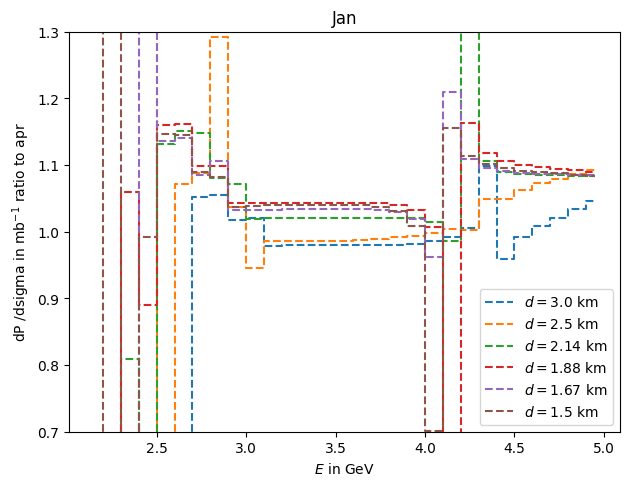

/tmp/ipykernel_2576999/4267100454.py:16: RuntimeWarning: invalid value encountered in divide
  plt.plot(e_center, dP_dsig_500_jul[d,]/dP_dsig_500_apr[d,],label="$d=$" + str(np.round(sl[d],decimals=2)) + " km",drawstyle='steps-mid',ls='--')


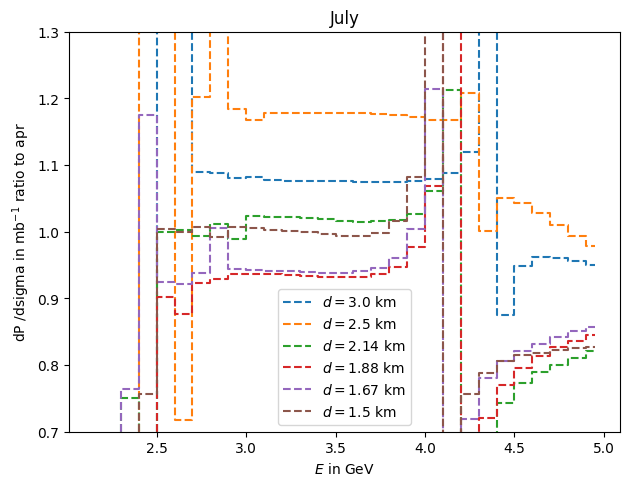

<Figure size 640x480 with 0 Axes>

In [52]:
# ratio to apr

for d in range(len(sl)):
    plt.plot(e_center, dP_dsig_500_jan[d,]/dP_dsig_500_apr[d,],label="$d=$" + str(np.round(sl[d],decimals=2)) + " km",drawstyle='steps-mid',ls='--')
plt.ylabel('dP /dsigma in mb$^{-1}$ ratio to apr')
plt.xlabel('$E$ in GeV')
plt.ylim([0.7,1.3])
plt.legend()
plt.tight_layout()
plt.title('Jan')
plt.savefig(plot_dir + 'cs_p_energybintest_powerlawderiv_dPdsig_ratio-to-apr_ebin_slantdepth_season_jan.png')
plt.show()
plt.clf()

for d in range(len(sl)):
    plt.plot(e_center, dP_dsig_500_jul[d,]/dP_dsig_500_apr[d,],label="$d=$" + str(np.round(sl[d],decimals=2)) + " km",drawstyle='steps-mid',ls='--')
plt.ylabel('dP /dsigma in mb$^{-1}$ ratio to apr')
plt.xlabel('$E$ in GeV')
plt.ylim([0.7,1.3])
plt.legend()
plt.tight_layout()
plt.title('July')
plt.savefig(plot_dir + 'cs_p_energybintest_powerlawderiv_dPdsig_ratio-to-apr_ebin_slantdepth_season_jul.png')
plt.show()
plt.clf()


In [14]:
dP_dsig_500_jul[0,]/dP_dsig_500_apr[0,]

/tmp/ipykernel_2576999/84362778.py:1: RuntimeWarning: invalid value encountered in divide
  dP_dsig_500_jul[0,]/dP_dsig_500_apr[0,]


array([        nan,         nan,  0.        , -7.5       , 75.33333333,
        1.35820896,  1.09001593,  1.0872563 ,  1.08104773,  1.08134389,
        1.07728653,  1.07652937,  1.07613579,  1.07568876,  1.07514842,
        1.0746333 ,  1.07426004,  1.07420624,  1.07513285,  1.07839987,
        1.08779656,  1.11991704,  1.45304987,  0.87431624,  0.94852818,
        0.96128208,  0.96087303,  0.95598742,  0.9494283 ])

In [ ]:
logy_mod_500 = np.ndarray(shape=(len(sl),len(season_values),len(e0_values),len(x_log)))
y_log_def_sl_500 = np.ndarray(shape=(len(sl),len(season_values),len(x_log)))

for s in range(len(sl)):  
    for sea in range(len(season_values)):  
        y_log_def_sl_500[s][sea] = get_log_y(sl[s], angle, 1.0, cs_k ,2.05,"inf",season_values[sea],threshold=500)
        
        for en in range(len(e0_values)):
            logy_mod_500[s][sea][en] = get_log_y(sl[s], angle, cs_p, cs_k ,e0_values[en],e1_values[en],season_values[sea],threshold=500)
           

[ -3.67179657  -4.83388428  -5.55937752  -6.07247195  -6.45902523
  -6.767051    -7.02185275  -7.24008511  -7.43261773  -7.60048674
  -7.75239682  -7.89116337  -8.02196037  -8.13984555  -8.24981512
  -8.3552229   -8.45167021  -8.54269171  -8.62936677  -8.71105821
  -8.78878152  -8.86289254  -8.93514499  -9.00273026  -9.06753243
  -9.12976504  -9.18962294  -9.24965131  -9.30499938  -9.35845203
  -9.4101347   -9.46016079  -9.50863316  -9.55697531  -9.60248951
  -9.64671065  -9.68971023  -9.73155226  -9.77229347  -9.8119863
  -9.85163973  -9.88930635  -9.92606314  -9.96194974  -9.99700329
 -10.03125861 -10.06474841 -10.09750343 -10.12955265 -10.16256047
 -10.19317603 -10.22316542 -10.25255161 -10.28135633 -10.3096002
 -10.33730277 -10.36448261 -10.39115736 -10.41734382 -10.44339172
 -10.46863217 -10.49343038 -10.51780021 -10.54175488 -10.56530705
 -10.58846877 -10.61125135 -10.63366554 -10.65572164 -10.67742955
 -10.69879876 -10.71983843 -10.7428971  -10.76320893 -10.78321817
 -10.8029326

In [19]:
logy_mod_500.shape

(101,)

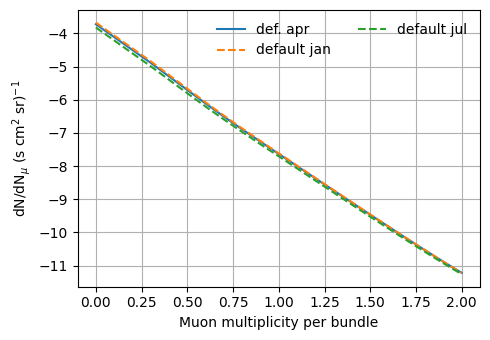

In [ ]:
# plot multi spectrum in log log

plt.figure(figsize=(5.0, 3.5))
lines=[]
angle = 0.0
plt.plot(np.log10(helper.n_mu_vec),y_log_def_sl_500[0,1],label='def. apr')[0]
plt.plot(np.log10(helper.n_mu_vec),y_log_def_sl_500[0,0],label='default jan',ls='--')
plt.plot(np.log10(helper.n_mu_vec),y_log_def_sl_500[0,2],label='default jul',ls='--')

    
plt.xlabel("Muon multiplicity per bundle")
plt.ylabel(r"dN/dN$_\mu$ (s cm$^2$ sr)$^{-1}$")
lines.append(mlines.Line2D([], [], color='k', linestyle="--", label="aprl"))
plt.legend(handles=lines, frameon=False, loc="lower left")
plt.legend(frameon=False, ncol=2)

plt.grid()
plt.tight_layout()
plt.savefig(plot_dir + 'multispectrum_default_seasons.png')

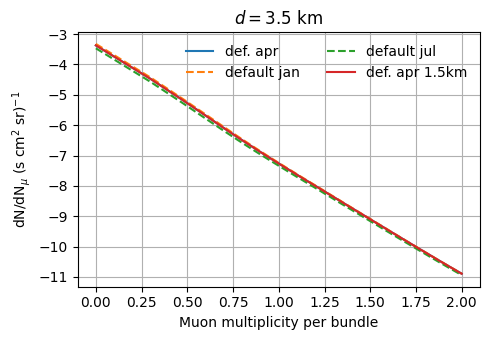

In [54]:
plt.figure(figsize=(5.0, 3.5))
lines=[]
angle = 0.0
plt.plot(np.log10(helper.n_mu_vec),y_log_def_sl_500[1,1],label='def. apr')[0]
plt.plot(np.log10(helper.n_mu_vec),y_log_def_sl_500[1,0],label='default jan',ls='--')
plt.plot(np.log10(helper.n_mu_vec),y_log_def_sl_500[1,2],label='default jul',ls='--')

plt.plot(np.log10(helper.n_mu_vec),y_log_def_sl_500[1,1],label='def. apr 1.5km')[0]
#plt.plot(np.log10(helper.n_mu_vec),y_log_def_sl_500[1,0],label='default jan',ls='--')
#plt.plot(np.log10(helper.n_mu_vec),y_log_def_sl_500[1,2],label='default jul',ls='--')

    
plt.xlabel("Muon multiplicity per bundle")
plt.ylabel(r"dN/dN$_\mu$ (s cm$^2$ sr)$^{-1}$")
lines.append(mlines.Line2D([], [], color='k', linestyle="--", label="aprl"))
plt.legend(handles=lines, frameon=False, loc="lower left")
plt.legend(frameon=False, ncol=2)

plt.title('$d=3.5$ km')

plt.grid()
plt.tight_layout()
plt.savefig(plot_dir + 'multispectrum_default_seasons_d3.5km.png')

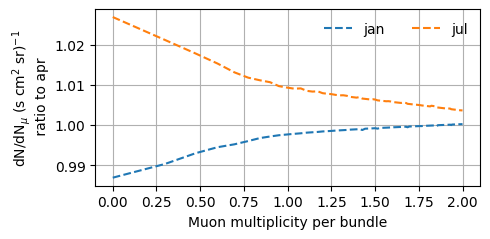

In [37]:

plt.figure(figsize=(5.0, 2.5))
lines=[]
angle = 0.0

plt.plot(np.log10(helper.n_mu_vec),y_log_def_sl_500[0,0]/y_log_def_sl_500[0,1],label='jan',ls='--')
plt.plot(np.log10(helper.n_mu_vec),y_log_def_sl_500[0,2]/y_log_def_sl_500[0,1],label='jul',ls='--')

    
plt.xlabel("Muon multiplicity per bundle")
plt.ylabel(r"dN/dN$_\mu$ (s cm$^2$ sr)$^{-1}$" + "\n" + " ratio to apr")

lines.append(mlines.Line2D([], [], color='k', linestyle="--", label="aprl"))
plt.legend(handles=lines, frameon=False, loc="lower left")
plt.legend(frameon=False, ncol=2)
#plt.ylim(-10, -1)
# plt.xlim(4,100)


plt.grid()
plt.tight_layout()
plt.savefig(plot_dir + 'multispectrum_default_seasons_ratio-to-apr.png')

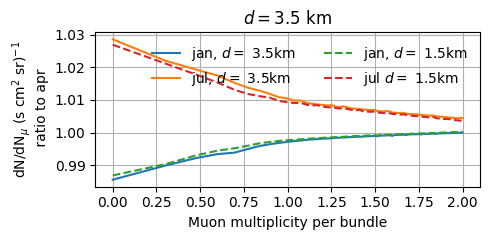

In [59]:
plt.figure(figsize=(5.0, 2.5))
lines=[]
angle = 0.0

plt.plot(np.log10(helper.n_mu_vec),y_log_def_sl_500[1,0]/y_log_def_sl_500[1,1],label='jan, $d=$ 3.5km')
plt.plot(np.log10(helper.n_mu_vec),y_log_def_sl_500[1,2]/y_log_def_sl_500[1,1],label='jul, $d=$ 3.5km')

plt.plot(np.log10(helper.n_mu_vec),y_log_def_sl_500[0,0]/y_log_def_sl_500[0,1],label='jan, $d=$ 1.5km',ls='--')
plt.plot(np.log10(helper.n_mu_vec),y_log_def_sl_500[0,2]/y_log_def_sl_500[0,1],label='jul $d=$ 1.5km',ls='--')

    
plt.xlabel("Muon multiplicity per bundle")
plt.ylabel(r"dN/dN$_\mu$ (s cm$^2$ sr)$^{-1}$" + "\n" + " ratio to apr")

lines.append(mlines.Line2D([], [], color='k', linestyle="--", label="aprl"))
plt.legend(handles=lines, frameon=False, loc="lower left")
plt.legend(frameon=False, ncol=2)
#plt.ylim(-10, -1)
# plt.xlim(4,100)
plt.title('$d=3.5$ km')


plt.grid()
plt.tight_layout()
plt.savefig(plot_dir + 'multispectrum_default_seasons_ratio-to-apr_alldepths.png')

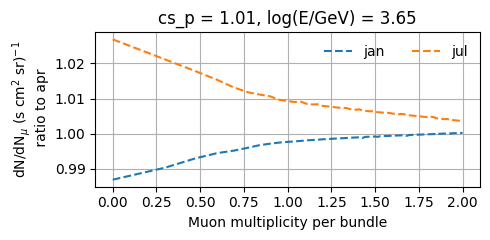

In [40]:
plt.figure(figsize=(5.0, 2.5))
lines=[]
angle = 0.0

plt.plot(np.log10(helper.n_mu_vec),logy_mod_500[0,0,15]/logy_mod_500[0,1,15],label='jan',ls='--')
plt.plot(np.log10(helper.n_mu_vec),logy_mod_500[0,2,15]/logy_mod_500[0,1,15],label='jul',ls='--')

    
plt.xlabel("Muon multiplicity per bundle")
plt.ylabel(r"dN/dN$_\mu$ (s cm$^2$ sr)$^{-1}$" + "\n" + " ratio to apr")
plt.title('cs_p = 1.01, log(E/GeV) = 3.65')
lines.append(mlines.Line2D([], [], color='k', linestyle="--", label="aprl"))
plt.legend(handles=lines, frameon=False, loc="lower left")
plt.legend(frameon=False, ncol=2)
#plt.ylim(-10, -1)
# plt.xlim(4,100)


plt.grid()
plt.tight_layout()
plt.savefig(plot_dir + 'multispectrum_cs_p1.01_seasons_ratio-to-apr_logE3-65.png')

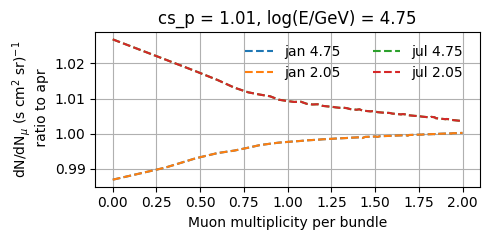

In [51]:
plt.figure(figsize=(5.0, 2.5))
lines=[]
angle = 0.0

plt.plot(np.log10(helper.n_mu_vec),logy_mod_500[0,0,25]/logy_mod_500[0,1,25],label='jan 4.75 ',ls='--')
plt.plot(np.log10(helper.n_mu_vec),logy_mod_500[0,0,0]/logy_mod_500[0,1,0],label='jan 2.05',ls='--')
plt.plot(np.log10(helper.n_mu_vec),logy_mod_500[0,2,25]/logy_mod_500[0,1,25],label='jul 4.75',ls='--')
plt.plot(np.log10(helper.n_mu_vec),logy_mod_500[0,2,0]/logy_mod_500[0,1,0],label='jul 2.05 ',ls='--')

    
plt.xlabel("Muon multiplicity per bundle")
plt.ylabel(r"dN/dN$_\mu$ (s cm$^2$ sr)$^{-1}$" + "\n" + " ratio to apr")
plt.title('cs_p = 1.01, log(E/GeV) = 4.75')
lines.append(mlines.Line2D([], [], color='k', linestyle="--", label="aprl"))
plt.legend(handles=lines, frameon=False, loc="lower left")
plt.legend(frameon=False, ncol=2)
#plt.ylim(-10, -1)
# plt.xlim(4,100)


plt.grid()
plt.tight_layout()
plt.savefig(plot_dir + 'multispectrum_cs_p1.01_seasons_ratio-to-apr_4.75.png')

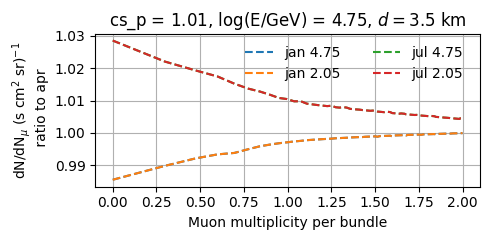

In [60]:
plt.figure(figsize=(5.0, 2.5))
lines=[]
angle = 0.0

plt.plot(np.log10(helper.n_mu_vec),logy_mod_500[1,0,25]/logy_mod_500[1,1,25],label='jan 4.75 ',ls='--')
plt.plot(np.log10(helper.n_mu_vec),logy_mod_500[1,0,0]/logy_mod_500[1,1,0],label='jan 2.05',ls='--')
plt.plot(np.log10(helper.n_mu_vec),logy_mod_500[1,2,25]/logy_mod_500[1,1,25],label='jul 4.75',ls='--')
plt.plot(np.log10(helper.n_mu_vec),logy_mod_500[1,2,0]/logy_mod_500[1,1,0],label='jul 2.05 ',ls='--')

    
plt.xlabel("Muon multiplicity per bundle")
plt.ylabel(r"dN/dN$_\mu$ (s cm$^2$ sr)$^{-1}$" + "\n" + " ratio to apr")
plt.title('cs_p = 1.01, log(E/GeV) = 4.75, $d=3.5$ km')
lines.append(mlines.Line2D([], [], color='k', linestyle="--", label="aprl"))
plt.legend(handles=lines, frameon=False, loc="lower left")
plt.legend(frameon=False, ncol=2)
#plt.ylim(-10, -1)
# plt.xlim(4,100)


plt.grid()
plt.tight_layout()
plt.savefig(plot_dir + 'multispectrum_cs_p1.01_seasons_ratio-to-apr_4.75_d3.5km.png')

In [43]:
logy_mod_500[0,0,:,10]/logy_mod_500[0,1,:,10]

array([0.99778611, 0.99778611, 0.99778611, 0.99778611, 0.99778611,
       0.99778611, 0.99778611, 0.99778611, 0.99778611, 0.99778611,
       0.99778612, 0.99778624, 0.9977864 , 0.99778626, 0.99778586,
       0.99778555, 0.99778545, 0.9977855 , 0.99778558, 0.99778562,
       0.99778562, 0.99778558, 0.9977855 , 0.99778541, 0.99778531,
       0.99778521, 0.99778512, 0.99778504, 0.99778497])

approx. constanst seasonal variations, but why does it have a large impact on the sensitivity? up to 0.01% precision. Low multiplicity bundles up to 10 have a seasonal variation in January. Where dP/disg = 0 --> large seasonal impact on sensitivity because tendencey of positive to negative dP/dsig changes with season

In [ ]:
plt.figure(figsize=(5.0, 2.5))
lines=[]
angle = 0.0

plt.plot(np.log10(helper.n_mu_vec),logy_mod_500[0,0,25]/logy_mod_500[0,1,25],label='jan',ls='--')
plt.plot(np.log10(helper.n_mu_vec),logy_mod_500[0,2,15]/logy_mod_500[0,1,15],label='jul',ls='--')

    
plt.xlabel("Muon multiplicity per bundle")
plt.ylabel(r"dN/dN$_\mu$ (s cm$^2$ sr)$^{-1}$" + "\n" + " ratio to apr")
plt.title('cs_p = 1.01, log(E/GeV) = ')
lines.append(mlines.Line2D([], [], color='k', linestyle="--", label="aprl"))
plt.legend(handles=lines, frameon=False, loc="lower left")
plt.legend(frameon=False, ncol=2)
#plt.ylim(-10, -1)
# plt.xlim(4,100)


plt.grid()
plt.tight_layout()
plt.savefig(plot_dir + 'multispectrum_cs_p1.01_seasons_ratio-to-apr_logE.png')

array([  1.  ,   1.99,   2.98,   3.97,   4.96,   5.95,   6.94,   7.93,
         8.92,   9.91,  10.9 ,  11.89,  12.88,  13.87,  14.86,  15.85,
        16.84,  17.83,  18.82,  19.81,  20.8 ,  21.79,  22.78,  23.77,
        24.76,  25.75,  26.74,  27.73,  28.72,  29.71,  30.7 ,  31.69,
        32.68,  33.67,  34.66,  35.65,  36.64,  37.63,  38.62,  39.61,
        40.6 ,  41.59,  42.58,  43.57,  44.56,  45.55,  46.54,  47.53,
        48.52,  49.51,  50.5 ,  51.49,  52.48,  53.47,  54.46,  55.45,
        56.44,  57.43,  58.42,  59.41,  60.4 ,  61.39,  62.38,  63.37,
        64.36,  65.35,  66.34,  67.33,  68.32,  69.31,  70.3 ,  71.29,
        72.28,  73.27,  74.26,  75.25,  76.24,  77.23,  78.22,  79.21,
        80.2 ,  81.19,  82.18,  83.17,  84.16,  85.15,  86.14,  87.13,
        88.12,  89.11,  90.1 ,  91.09,  92.08,  93.07,  94.06,  95.05,
        96.04,  97.03,  98.02,  99.01, 100.  ])